In [2]:
import pandas as pd
import numpy as np
import glob
import geopandas as gpd
import folium

In [19]:
finalDframe = pd.DataFrame()

files = glob.glob('../../rawdata/taxi/*tripdata_2018*')
for file in files:
    
    print('Reading file ',file, '...')
    currentDF = pd.read_csv(file)
    
    dropoffsDF = currentDF[['tpep_dropoff_datetime', 'DOLocationID']]
    pickupsDF = currentDF[['tpep_pickup_datetime','PULocationID']]
    
    dropoffsDF.rename(columns={"DOLocationID": "location", "tpep_dropoff_datetime":"datetime"}, inplace=True)
    pickupsDF.rename(columns={"PULocationID": "location", "tpep_pickup_datetime":"datetime"}, inplace=True)
    
    print('\t to datetime...')
    dropoffsDF['datetime'] = pd.to_datetime(dropoffsDF['datetime'])
    pickupsDF['datetime'] = pd.to_datetime(pickupsDF['datetime'])
    
    dropoffsDF.set_index(['datetime'], inplace=True)
    pickupsDF.set_index(['datetime'], inplace=True)

    finalDframe = finalDframe.append(dropoffsDF)
    finalDframe = finalDframe.append(pickupsDF)

Reading file  ../../rawdata/taxi/yellow_tripdata_2018-05.csv ...


/home/jlrulff/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


	 to datetime...


/home/jlrulff/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/jlrulff/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Reading file  ../../rawdata/taxi/yellow_tripdata_2018-01.csv ...
	 to datetime...
Reading file  ../../rawdata/taxi/yellow_tripdata_2018-10.csv ...
	 to datetime...
Reading file  ../../rawdata/taxi/yellow_tripdata_2018-09.csv ...
	 to datetime...
Reading file  ../../rawdata/taxi/yellow_tripdata_2018-11.csv ...
	 to datetime...
Reading file  ../../rawdata/taxi/yellow_tripdata_2018-12.csv ...
	 to datetime...
Reading file  ../../rawdata/taxi/yellow_tripdata_2018-07.csv ...
	 to datetime...
Reading file  ../../rawdata/taxi/yellow_tripdata_2018-04.csv ...
	 to datetime...
Reading file  ../../rawdata/taxi/yellow_tripdata_2018-03.csv ...
	 to datetime...
Reading file  ../../rawdata/taxi/yellow_tripdata_2018-02.csv ...
	 to datetime...
Reading file  ../../rawdata/taxi/yellow_tripdata_2018-06.csv ...
	 to datetime...
Reading file  ../../rawdata/taxi/yellow_tripdata_2018-08.csv ...
	 to datetime...


In [20]:
finalDframe.sort_index(ascending=True, inplace=True)

In [23]:
finalDframe = finalDframe['2018-01-01':'2019-01-01']

In [24]:
finalDframe.to_pickle('../../data/taxi/taxi_2018.pkl')

## Visualizing Taxi Regions

In [9]:
# loading taxi regions
taxi_regions = gpd.read_file('zip://../../assets/taxi_zones.zip')

# translating polygon to lat/lng
crs = {'init': 'epsg:4326'}
taxi_regions = taxi_regions.to_crs(crs)

In [15]:
taxi_regions = taxi_regions[taxi_regions['borough'] == 'Manhattan']

In [26]:
m = folium.Map(location=[40.73089125, -73.99758503833021], tiles='stamenterrain', zoom_start=3)

folium.GeoJson(
    taxi_regions,
    name='geojson'
).add_to(m)

folium.Marker([40.729432, -73.993588]).add_to(m)

m

## Visualizing Time Series

In [3]:
## loading taxi
taxi = pd.read_pickle('../../data/taxi/taxi.pkl')

In [12]:
plot = taxi[taxi['location'] == 224]
plot = plot.resample('H').agg({'location': 'count'})

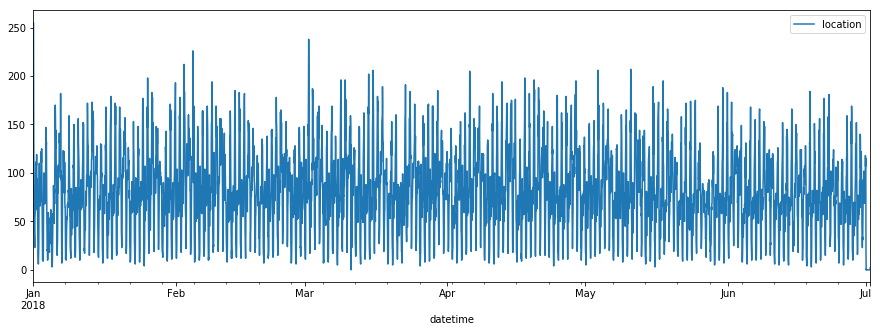

In [16]:
plot.plot(figsize=(15,5))